In [1]:
library(tidyverse)
pop <- read.csv('/kaggle/input/population/Population.csv', skip = 4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Import
####   2.1. Preview the contents of who.tsv and population.csv by inspecting the files.



In [2]:
glimpse(who)
cat("\n")
glimpse(pop)

Rows: 7,240
Columns: 60
$ country      <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan…
$ iso2         <chr> "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF…
$ iso3         <chr> "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "…
$ year         <dbl> 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 198…
$ new_sp_m014  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m1524 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m2534 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m3544 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m4554 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m5564 <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_m65   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_f014  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ new_sp_f1524 <

####   2.2. Import the data into tibbles named who and population.


In [3]:
who <- as_tibble(who)
pop <- as_tibble(pop)


####   2.3. Determine the number of rows and columns in each tibble.


In [4]:
who_dim <- dim(who)
pop_dim <-dim(pop)
who_dim
pop_dim

cat("WHO has 7240 rows and 60 columns.\n")
cat("Population has 266 rows and 69 columns.\n")

[1] 7240   60

[1] 266  69

WHO has 7240 rows and 60 columns.
Population has 266 rows and 69 columns.


#### 2.4. Check the summary of variable types for population.csv. Fix any anomalies and store the corrected data in population2.

In [5]:
summary(pop)
anyNA(pop)

population2 <- pop |> select(where(~ !all(is.na(.))))

 Country.Name       Country.Code       Indicator.Name     Indicator.Code    
 Length:266         Length:266         Length:266         Length:266        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     X1960               X1961               X1962          
 Min.   :2.715e+03   Min.   :2.970e+03   Min.   :3.264e+03  
 1st Qu.:5.152e+05   1st Qu.:5.255e+05   1st Qu.:5.363e+05  
 Median :3.660e+06   Median :3.747e+06   Median :3.832e+06  
 Mean   :1.154e+08   Mean   :1.171e+08   Mean   :1.192e+08  
 3rd Qu.:2.686e+07   3rd Qu.:2.761e+07   3rd Qu.:2.837e+07  
 Max.   :3.022e+09

[1] TRUE

Using summary, we see an extra unecessary column at the end of the csv filled with NAs. We will drop it to clean the data. Any other NAs will now just be from missing values instead of huge errors like an entire column.

In [6]:
glimpse(population2)

Rows: 266
Columns: 68
$ Country.Name   <chr> "Aruba", "Africa Eastern and Southern", "Afghanistan", …
$ Country.Code   <chr> "ABW", "AFE", "AFG", "AFW", "AGO", "ALB", "AND", "ARB",…
$ Indicator.Name <chr> "Population, total", "Population, total", "Population, …
$ Indicator.Code <chr> "SP.POP.TOTL", "SP.POP.TOTL", "SP.POP.TOTL", "SP.POP.TO…
$ X1960          <dbl> 54922, 130072080, 9035043, 97630925, 5231654, 1608800, …
$ X1961          <dbl> 55578, 133534923, 9214083, 99706674, 5301583, 1659800, …
$ X1962          <dbl> 56320, 137171659, 9404406, 101854756, 5354310, 1711319,…
$ X1963          <dbl> 57002, 140945536, 9604487, 104089175, 5408320, 1762621,…
$ X1964          <dbl> 57619, 144904094, 9814318, 106388440, 5464187, 1814135,…
$ X1965          <dbl> 58190, 149033472, 10036008, 108772632, 5521981, 1864791…
$ X1966          <dbl> 58694, 153281203, 10266395, 111246953, 5581386, 1914573…
$ X1967          <dbl> 58990, 157704381, 10505959, 113795019, 5641807, 1965598…
$ X1968          <


# Tidy Data
#### 3.1 who Dataset
Description of Columns:
country: Country name.

iso2: Two-digit country code.

iso3: Three-digit country code.

year: Year.

Variables like new_ep_f014:

ep: TB type (e.g., rel = relapse, ep = extrapulmonary).

f: Sex (e.g., f = female).

014: Age group (e.g., 0-14 years).

Steps:
  #### 3.1.1 Identify the variables in the dataset.

country → country name

iso2 → 2-letter country code

iso3 → 3-letter country code

year → year of observation

The rest of the columns are also variables, however, for example, new_ep_f014 contains multiple variables within:

ep: TB type (e.g., rel = relapse, ep = extrapulmonary).

f: Sex (e.g., f = female).

014: Age group (e.g., 0-14 years).

We must separate these to make a tidy dataset.

  #### 3.1.2 Perform a pivot operation to make the data tidy, storing the result in who2.

  Additionally, I will also drop the ISO columns which are unecessary to make a tidier dataset later.


In [7]:
who2 <- who %>%
    select(-iso2, -iso3) %>%
    pivot_longer(
        cols = new_sp_m014:newrel_f65,
        names_to = 'keys',
        values_to = 'cases',
        values_drop_na = TRUE
    ) %>%
    mutate(keys = str_replace(keys, 'newrel', 'new_rel'))

who2

country,year,keys,cases
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1997,new_sp_m014,0
Afghanistan,1997,new_sp_m1524,10
Afghanistan,1997,new_sp_m2534,6
Afghanistan,1997,new_sp_m3544,3
Afghanistan,1997,new_sp_m4554,5
Afghanistan,1997,new_sp_m5564,2
Afghanistan,1997,new_sp_m65,0
Afghanistan,1997,new_sp_f014,5
Afghanistan,1997,new_sp_f1524,38


  #### 3.1.3 Separate values like new_ep_f014 into components (e.g., new, ep, f014). Remove the column containing new, and store the result in who3.

  

In [8]:
who3 <- who2 %>%
    separate(keys, c('new', 'type', 'sexage'), sep = '_')

who3

country,year,new,type,sexage,cases
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,1997,new,sp,m014,0
Afghanistan,1997,new,sp,m1524,10
Afghanistan,1997,new,sp,m2534,6
Afghanistan,1997,new,sp,m3544,3
Afghanistan,1997,new,sp,m4554,5
Afghanistan,1997,new,sp,m5564,2
Afghanistan,1997,new,sp,m65,0
Afghanistan,1997,new,sp,f014,5
Afghanistan,1997,new,sp,f1524,38


#### 3.1.4 Further separate values like f014 into f and 014, storing the result in who_tidy.

In [9]:
who_tidy <- who3 %>%
    separate(sexage, c('sex','age'), sep = 1)

who_tidy

country,year,new,type,sex,age,cases
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,1997,new,sp,m,014,0
Afghanistan,1997,new,sp,m,1524,10
Afghanistan,1997,new,sp,m,2534,6
Afghanistan,1997,new,sp,m,3544,3
Afghanistan,1997,new,sp,m,4554,5
Afghanistan,1997,new,sp,m,5564,2
Afghanistan,1997,new,sp,m,65,0
Afghanistan,1997,new,sp,f,014,5
Afghanistan,1997,new,sp,f,1524,38


# 3.2 Population Dataset
#### 3.2.1 Identify the variables in this dataset.

From above we can see the variables are:

Country.Name, Country.Code, Indicator.Name, Indicator.Code, and then individual columns for the years 1960 to 2023.

#### 3.2.2 Perform a pivot operation to tidy the data, storing the result in population3.

#### 3.2.3 Cast the population variable to an appropriate data type, storing the result in population_tidy.

In [10]:
population3 <- population2 %>%
    pivot_longer(
        cols = 'X1960':'X2023',
        names_to = 'year',
        values_to = 'population',
        names_prefix = 'X'
    )
population3$population <- as.integer(population3$population)
population3$year <- as.integer(population3$year)
population_tidy <- population3

population_tidy 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion to integer range”


Country.Name,Country.Code,Indicator.Name,Indicator.Code,year,population
<chr>,<chr>,<chr>,<chr>,<int>,<int>
Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922
Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55578
Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56320
Aruba,ABW,"Population, total",SP.POP.TOTL,1963,57002
Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57619
Aruba,ABW,"Population, total",SP.POP.TOTL,1965,58190
Aruba,ABW,"Population, total",SP.POP.TOTL,1966,58694
Aruba,ABW,"Population, total",SP.POP.TOTL,1967,58990
Aruba,ABW,"Population, total",SP.POP.TOTL,1968,59069


# 3.3 Join Datasets
####  3.3.1 Identify the variable(s) required to join who_tidy and population_tidy.

We can use both the three-digit country code as well as the country names. However, to avoid redundancy and unnecessary bloat, we will only use country names and drop the three-digit country code later. We will also use year to join.

####  3.3.2 Rename columns as needed to align variable names between datasets.

####  3.3.3 Join the datasets into a tibble called tuberculosis.

In [11]:
population_tidy <- rename(population_tidy, country_name = Country.Name)
who_tidy <- rename(who_tidy, country_name = country)

In [12]:
# WHO uses United States of America and Population uses United States so we match them to join them later
# They also use different names for other countries which we will fix.
setdiff(unique(who_tidy$country_name), unique(population_tidy$country_name))

country_map <- c(
  "United States of America" = "United States",
  "Bolivia (Plurinational State of)" = "Bolivia",
  "Czech Republic" = "Czechia",
  "Democratic Republic of the Congo" = "Congo, Dem. Rep.",
  "Republic of Korea" = "Korea, Rep.",
  "Iran (Islamic Republic of)" = "Iran, Islamic Rep.",
  "Micronesia (Federated States of)" = "Micronesia, Fed. Sts.",
  "Venezuela (Bolivarian Republic of)" = "Venezuela, RB",
  "United Republic of Tanzania" = "Tanzania",
  "Bahamas" = "Bahamas, The",
  "Egypt" = "Egypt, Arab Rep.",
  "Gambia" = "Gambia, The",
  "Kyrgyzstan" = "Kyrgyz Republic",
  "Lao People's Democratic Republic" = "Lao PDR",
  "Swaziland" = "Eswatini",
  "The Former Yugoslav Republic of Macedonia" = "North Macedonia",
  "Republic of Moldova" = "Moldova",
  "United Kingdom of Great Britain and Northern Ireland" = "United Kingdom",
  "US Virgin Islands" = "Virgin Islands, U.S."
)

who_tidy <- who_tidy %>%
  mutate(country_name = recode(country_name, !!!country_map))

[1] "Anguilla"                                            
 [2] "Bahamas"                                             
 [3] "Bolivia (Plurinational State of)"                    
 [4] "Bonaire, Saint Eustatius and Saba"                   
 [5] "China, Hong Kong SAR"                                
 [6] "China, Macao SAR"                                    
 [7] "Congo"                                               
 [8] "Cook Islands"                                        
 [9] "Czech Republic"                                      
[10] "Democratic People's Republic of Korea"               
[11] "Democratic Republic of the Congo"                    
[12] "Egypt"                                               
[13] "Gambia"                                              
[14] "Iran (Islamic Republic of)"                          
[15] "Kyrgyzstan"                                          
[16] "Lao People's Democratic Republic"                    
[17] "Micronesia (Federated States of)"                    
[18] "Montserrat"                                          
[19] "Netherlands Antilles"                                
[20] "Niue"                                                
[21] "Republic of Korea"                                   
[22] "Republic of Moldova"                                 
[23] "Saint Kitts and Nevis"                               
[24] "Saint Lucia"                                         
[25] "Saint Vincent and the Grenadines"                    
[26] "Serbia & Montenegro"                                 
[27] "Slovakia"                                            
[28] "Swaziland"                                           
[29] "The Former Yugoslav Republic of Macedonia"           
[30] "Tokelau"                                             
[31] "Turkey"                                              
[32] "United Kingdom of Great Britain and Northern Ireland"
[33] "United Republic of Tanzania"                         
[34] "United States of America"                            
[35] "US Virgin Islands"                                   
[36] "Venezuela (Bolivarian Republic of)"                  
[37] "Wallis and Futuna Islands"                           
[38] "West Bank and Gaza Strip"                            
[39] "Yemen"

In [13]:
tuberculosis <- who_tidy %>%
    left_join(population_tidy, by = c('country_name', 'year'))

tuberculosis 

country_name,year,new,type,sex,age,cases,Country.Code,Indicator.Name,Indicator.Code,population
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
Afghanistan,1997,new,sp,m,014,0,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,m,1524,10,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,m,2534,6,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,m,3544,3,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,m,4554,5,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,m,5564,2,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,m,65,0,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,f,014,5,AFG,"Population, total",SP.POP.TOTL,18452091
Afghanistan,1997,new,sp,f,1524,38,AFG,"Population, total",SP.POP.TOTL,18452091


# 3.4 Clean Up Data
#### 3.4.1 Remove unnecessary variables from tuberculosis.

#### 3.4.2 Filter out rows with NA values.

#### 3.4.3 Save the cleaned data back into tuberculosis.

 

In [14]:
tuberculosis <- tuberculosis %>%
    select(-Country.Code, -Indicator.Name, -Indicator.Code) %>%
    drop_na()

In [15]:
tuberculosis

country_name,year,new,type,sex,age,cases,population
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
Afghanistan,1997,new,sp,m,014,0,18452091
Afghanistan,1997,new,sp,m,1524,10,18452091
Afghanistan,1997,new,sp,m,2534,6,18452091
Afghanistan,1997,new,sp,m,3544,3,18452091
Afghanistan,1997,new,sp,m,4554,5,18452091
Afghanistan,1997,new,sp,m,5564,2,18452091
Afghanistan,1997,new,sp,m,65,0,18452091
Afghanistan,1997,new,sp,f,014,5,18452091
Afghanistan,1997,new,sp,f,1524,38,18452091


# 4. Data Manipulation
#### 4.1 Determine the total TB cases among men and women in the 21st century in the United States. Identify which sex had more cases.

#### 4.2 Create a new variable, cases_per_100k, representing TB cases per 100,000 people by year, sex, age group, and TB type.

#### 4.3 Identify:

The country and year with the highest cases per 100k.

The country and year with the lowest cases per 100k.

In [38]:
# 4.1
tuberculosis %>%
    filter(country_name == 'United States', year >= 2000) %>%
    group_by(sex) %>%
    summarize(total_cases = sum(cases))

cat("Men have more total cases at 77,867 when compared to women with 45,768 cases")

# 4.2
tuberculosis <- tuberculosis %>%
    mutate(cases_per_100k = (cases/population) * 100000)

tuberculosis_summary <- tuberculosis %>%
  group_by(year, sex, age, type) %>%
  summarise(
    mean_cases_per_100k = mean(cases_per_100k, na.rm = TRUE),
    total_cases = sum(cases, na.rm = TRUE),
    total_population = sum(population, na.rm = TRUE),
    .groups = "drop"
  )

tuberculosis_summary

# 4.3
# Highest
tuberculosis %>%
  slice_max(cases_per_100k, n = 1) %>%
  select(country_name, year, cases_per_100k)

cat("Samoa, during 2009, had the highest cases per 100k at 580.1173 cases.")

# Lowest
tuberculosis %>%
  filter(cases_per_100k > 0) %>% 
  slice_min(cases_per_100k, n = 1, with_ties = FALSE) %>%
  select(country_name, year, cases_per_100k)

cat("The Russian Federation, during 2000, had the lowest cases per 100k at 0.0006821428 cases.")

sex,total_cases
<chr>,<dbl>
f,45768
m,77867


Men have more total cases at 77,867 when compared to women with 45,768 cases

year,sex,age,type,mean_cases_per_100k,total_cases,total_population
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1980,f,014,sp,0.07342244,18,24515667
1980,f,1524,sp,0.25289950,62,24515667
1980,f,2534,sp,0.20803024,51,24515667
1980,f,3544,sp,0.13868682,34,24515667
1980,f,4554,sp,0.12644975,31,24515667
1980,f,5564,sp,0.13460780,33,24515667
1980,f,65,sp,0.42421852,104,24515667
1980,m,014,sp,0.04894829,12,24515667
1980,m,1524,sp,0.22026731,54,24515667


country_name,year,cases_per_100k
<chr>,<dbl>,<dbl>
Samoa,2009,580.1173


Samoa, during 2009, had the highest cases per 100k

country_name,year,cases_per_100k
<chr>,<dbl>,<dbl>
Russian Federation,2000,0.0006821428


# 5. Data Visualization
####  5.1 Plot the total cases per 100k as a function of year for China, India, and the United States:

Use a log scale on the y-axis (scale_y_log10()).

Describe emerging patterns.

China (red line): Relatively high TB cases per 100k throughout the period, with some fluctuations but generally stable or slightly increasing.

India (green line): Rapid increase from mid-1990s to early 2000s, peaking around 2005–2010, then leveling off slightly.

United States (blue line): Much lower TB incidence compared to China and India, with a slow declining trend over time.


####  5.2 Compare distributions of total cases per 100k (summed over years, sexes, and TB types) across age groups:

Use a log scale on the y-axis.

Highlight observed patterns.

Highest TB incidence occurs in the 25-34 age group, followed closely by 15-24 and 35-44.

The 0-14 age group has the lowest TB incidence by a noticeable margin.

The older age groups (55-64 and 65+) have lower incidence than the middle-aged groups but still higher than children.

TB disproportionately affects young and middle-aged adults, likely due to higher exposure or vulnerabilities in working-age populations.

Children have the lowest incidence, consistent with epidemiological expectations.

####  5.3 Create a plot to evaluate whether the number of cases per 100k in 2000 was related to a country’s population:

Conclude based on the visualization.

The scatterplot shows no strong linear relationship between a country’s population size and TB cases per 100k.

Countries with both small and very large populations can have high or low TB incidence.

Points are spread widely vertically across all population sizes, indicating TB incidence is not simply related to population size.

TB burden depends more on other factors (health infrastructure, socioeconomics, TB control programs) rather than just population size.

Log–log scales helped reveal this pattern across many countries with varying populations.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


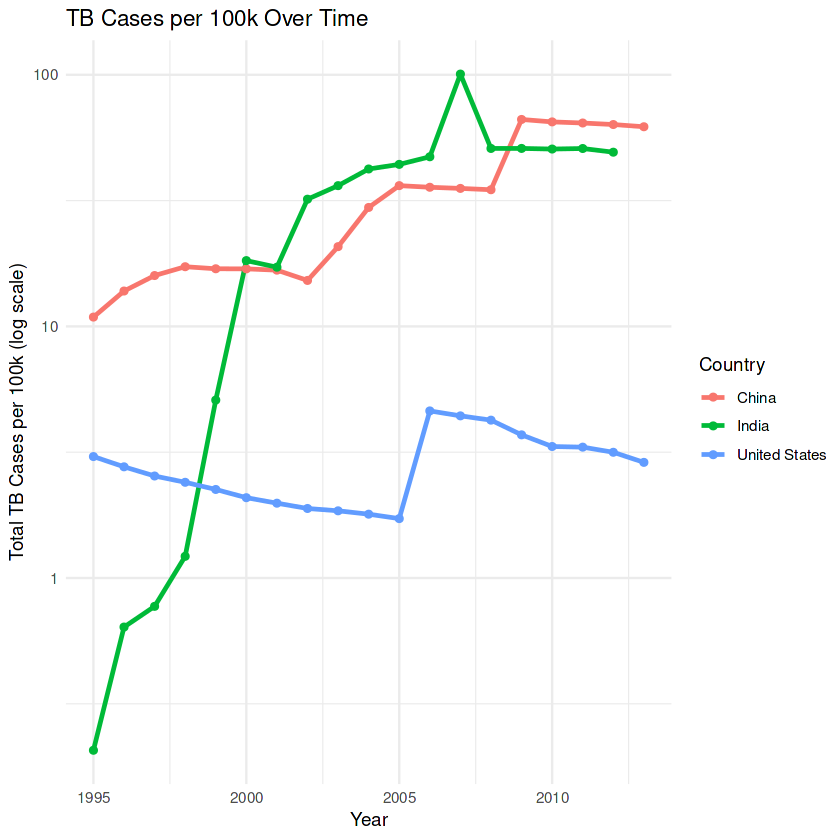

In [39]:
# 5.1
tuberculosis %>%
  filter(country_name %in% c("China", "India", "United States")) %>%
  group_by(country_name, year) %>%
  summarise(total_cases_per_100k = sum(cases_per_100k, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = year, y = total_cases_per_100k, color = country_name)) +
  geom_line(size = 1) +
  geom_point() +
  scale_y_log10() +
  labs(
    title = "TB Cases per 100k Over Time",
    x = "Year",
    y = "Total TB Cases per 100k (log scale)",
    color = "Country"
  ) +
  theme_minimal()

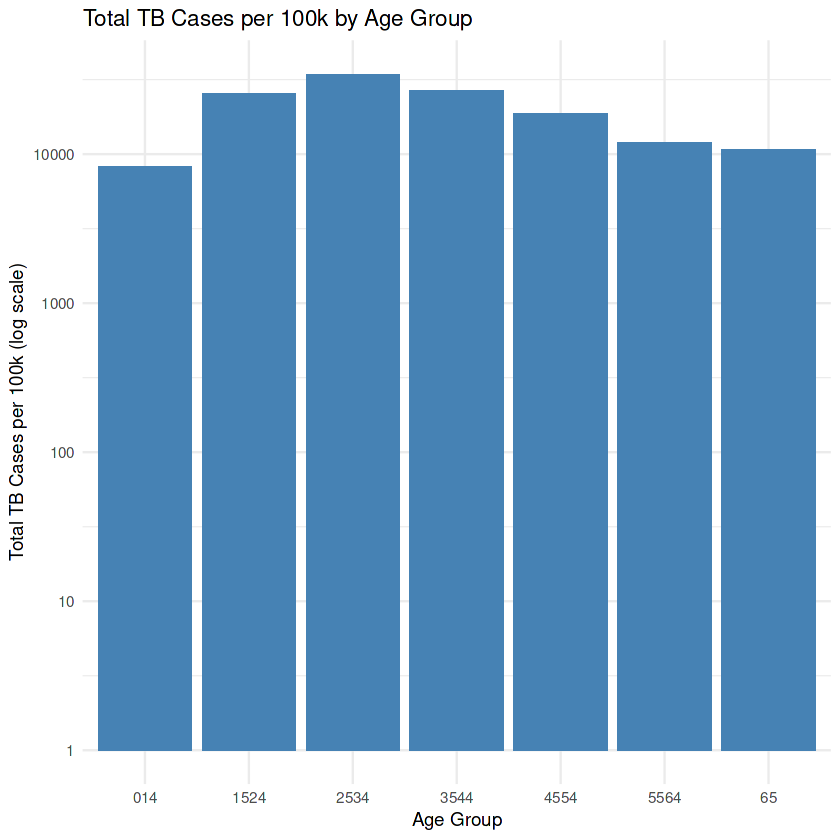

In [40]:
# 5.2
tuberculosis %>%
  group_by(age) %>%
  summarise(total_cases_per_100k = sum(cases_per_100k, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = age, y = total_cases_per_100k)) +
  geom_col(fill = "steelblue") +
  scale_y_log10() +
  labs(
    title = "Total TB Cases per 100k by Age Group",
    x = "Age Group",
    y = "Total TB Cases per 100k (log scale)"
  ) +
  theme_minimal()

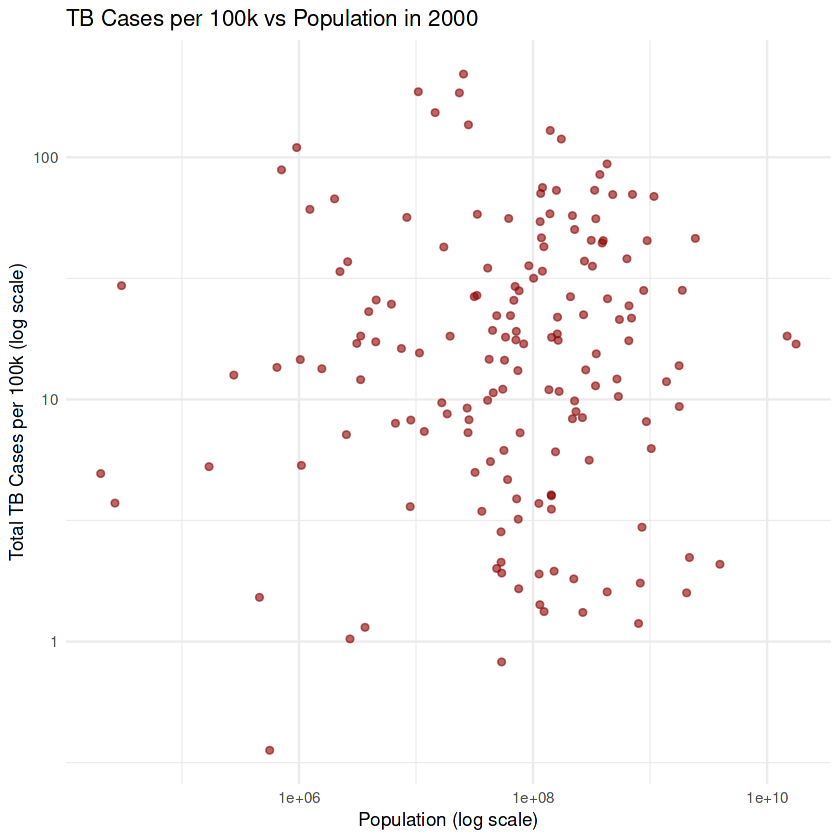

In [41]:
# 5.3
tuberculosis %>%
  filter(year == 2000) %>%
  group_by(country_name) %>%
  summarise(
    total_cases_per_100k = sum(cases_per_100k, na.rm = TRUE),
    population = sum(population, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  ggplot(aes(x = population, y = total_cases_per_100k)) +
  geom_point(color = "darkred", alpha = 0.6) +
  scale_y_log10() +
  scale_x_log10() +
  labs(
    title = "TB Cases per 100k vs Population in 2000",
    x = "Population (log scale)",
    y = "Total TB Cases per 100k (log scale)"
  ) +
  theme_minimal()